In [ ]:
"""
Analyze possessions by quarter

Macro
    Team Name
    Regular Season win %
    Mean possessions
Quarter
    Mean
    Max
    Min
    Range

Loop through events using game_id, REGULAR SEASON ONLY
    Assign home and away teams
Filter boxscore data by home/away

"""

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import sys
path_support = r'D:\Environments\mathletics\Support\\'  # Directory to support files
sys.path.append(path_support)


from sqlalchemy import create_engine
import psycopg2
database = 'mathletics'                                               
host = 'localhost'
user = 'postgres'
pgsql_pw = "CinCity79!"
con_string = f"postgresql://{user}:{pgsql_pw}@{host}/{database}"
engine = create_engine(con_string)
con = psycopg2.connect(con_string)

import xlsxwriter
import mathletics_utilities as mu
import matplotlib.pyplot as plt
import numpy as np

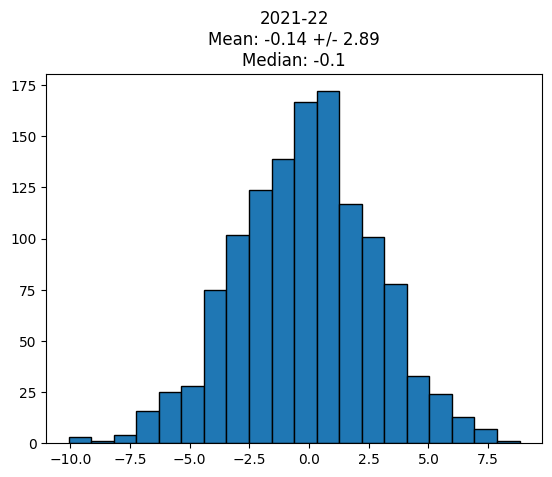

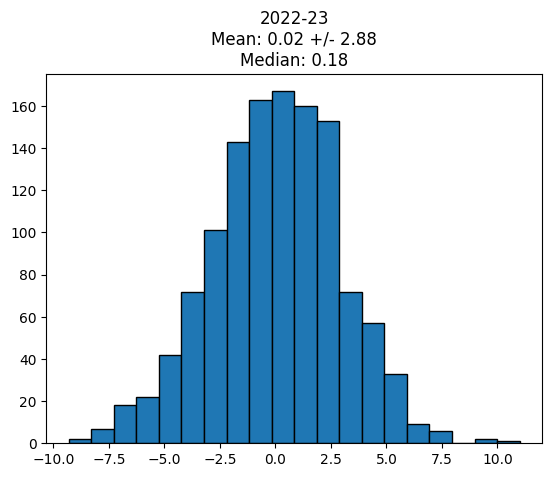

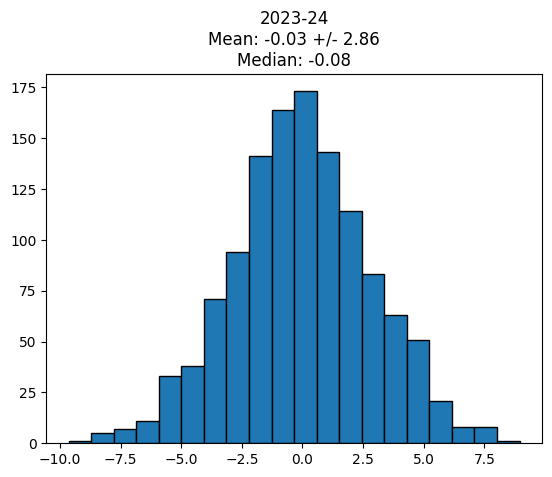

In [2]:
# Calculate REGULAR SEASON possessions to the event level, aggregate differences at league level
season_list = ["2021-22","2022-23","2023-24"]

for season in season_list:
    # Query data
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)

    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data
    
    pos_list = []

    for event in events.index:
        # Event-dependent assignments
        home_id = events.loc[event,"home_id"]               # Assign home
        away_id = events.loc[event,"away_id"]               # Assign away
        game_df = boxscores[ boxscores.game_id==event ]     # Event-level df
        # Partition game data by home/away
        home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        home_pos = mu.pos_calc(home_df)[0]
        away_pos = mu.pos_calc(away_df)[0]
        
        pos_list.append(home_pos-away_pos)

    plt.hist(pos_list,bins=20,edgecolor="black",linewidth=1)
    plt.title(f"{season}\nMean: {round(np.mean(pos_list),2)} +/- {round(np.std(pos_list),2)}\nMedian: {round(np.median(pos_list),2)}")
    plt.show()
    
    print()

Difference = home possessions - away possessions
    Negative: home possessions < away possessions
    Positive: home possessions > away possessions

Histograms for all three seasons appear normal-ish, with mean and median ~ 0
    Spread is consistent across all three seasons at +/- 2.8x possessions

Possession calculation: https://squared2020.com/2017/07/10/analyzing-nba-possession-models/
    (FGA - OREB) + TO + (FTA * c), c = .436
        This is a tally of the three main possession-ending events
            FGAs reult in:
                OREB, which does NOT end the possession, hence, their subtraction from FGAs
                FGMs, when a player scores
            TOs, when a team turns the ball over
            FTMs, but ONLY ON THE FINAL FT ATTEMPT. Final FTA is a possession-ending FTM ~.436
                OREBs can also occur on a final FTA

Theoretically, possessions should be either equal or team that takes first possession might have one more
    Free Throw Calculation
        There is no reasonable way to deduce change of possession after a FTA with available data
        Calculation implies that FTA ALWAYS results in a change of possession at a rate of c
    Jumpballs, FTA -> OREB, FTA -> FTMs and where in sequence they occurred:
        Would explain actual vs calculated discrepancies...but not differences in calculation

Next Steps:
    Calculate difference in FTA * c, charts and decriptive stats should be identical to above


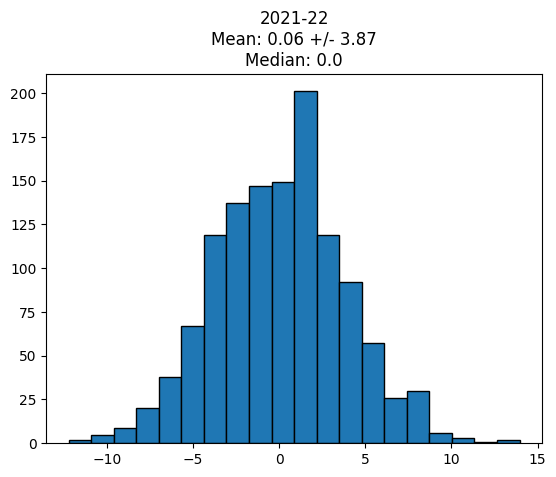

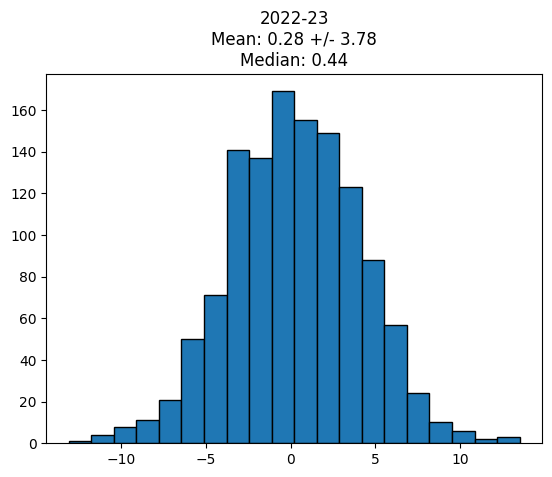

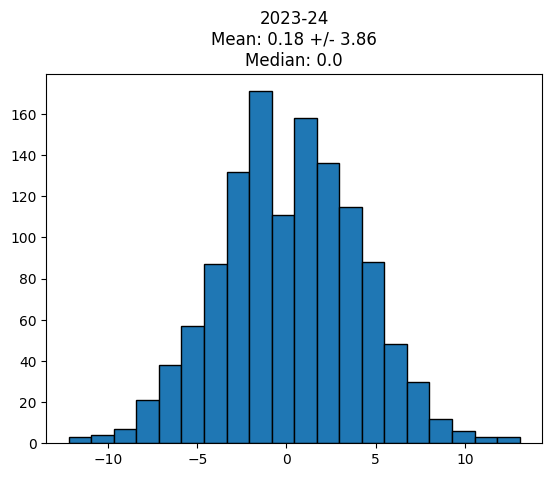

In [3]:
# Calculate REGULAR SEASON FTAs to the event level, aggregate differences at league level
# In mu.pos_calc():
    # I added a fta calculation and that is the only thing the function returns...
    # REVERT BACK
season_list = ["2021-22","2022-23","2023-24"]

for season in season_list:
    # Query data
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)

    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data
    
    fta_list = []

    for event in events.index:
        # Event-dependent assignments
        home_id = events.loc[event,"home_id"]               # Assign home
        away_id = events.loc[event,"away_id"]               # Assign away
        game_df = boxscores[ boxscores.game_id==event ]     # Event-level df
        # Partition game data by home/away
        home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        home_fta = mu.pos_calc(home_df)[1]
        away_fta = mu.pos_calc(away_df)[1]
        
        fta_list.append(home_fta-away_fta)

    plt.hist(fta_list,bins=20,edgecolor="black",linewidth=1)
    plt.title(f"{season}\nMean: {round(np.mean(fta_list),2)} +/- {round(np.std(fta_list),2)}\nMedian: {round(np.median(fta_list),2)}")
    plt.show()
    
    print()

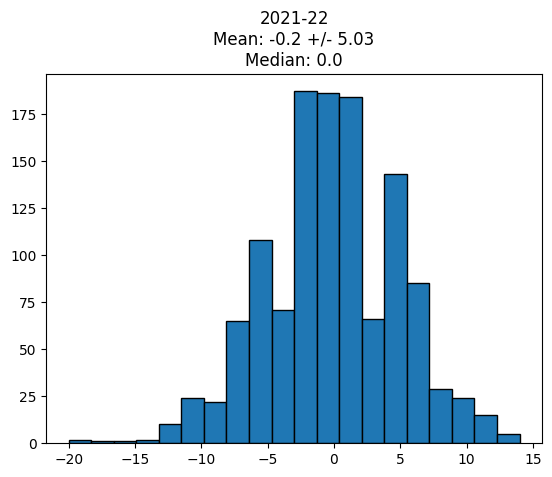

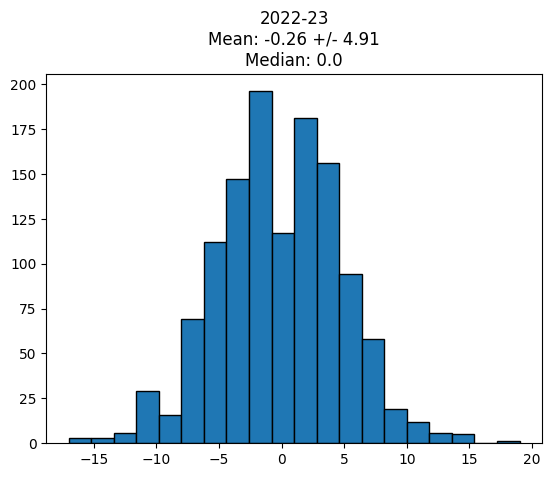

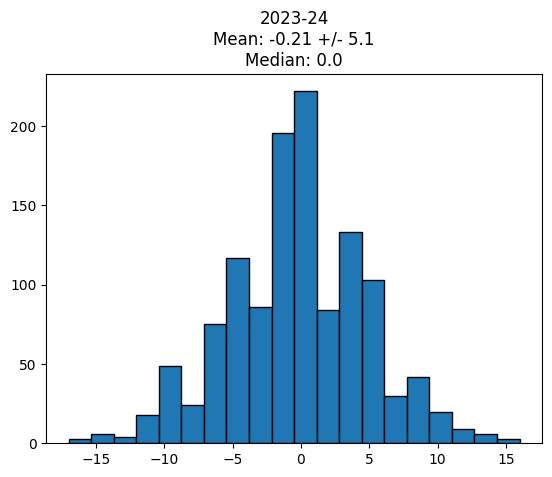

In [4]:
# Calculate REGULAR SEASON FTAs to the event level, aggregate differences at league level
# In mu.pos_calc():
    # I added a fta calculation and that is the only thing the function returns...
    # REVERT BACK
season_list = ["2021-22","2022-23","2023-24"]

for season in season_list:
    # Query data
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)

    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data
    
    rem_list = []

    for event in events.index:
        # Event-dependent assignments
        home_id = events.loc[event,"home_id"]               # Assign home
        away_id = events.loc[event,"away_id"]               # Assign away
        game_df = boxscores[ boxscores.game_id==event ]     # Event-level df
        # Partition game data by home/away
        home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        home_rem = mu.pos_calc(home_df)[2]
        away_rem = mu.pos_calc(away_df)[2]
        rem_list.append(home_rem-away_rem)

    plt.hist(rem_list,bins=20,edgecolor="black",linewidth=1)
    plt.title(f"{season}\nMean: {round(np.mean(rem_list),2)} +/- {round(np.std(rem_list),2)}\nMedian: {round(np.median(rem_list),2)}")
    plt.show()
    
    print()

In [ ]:
"""
I originally wanted to blame the variation on FTA alone, since it is the least scientific
of the equation for contributing to possessions. But by analyzing FTA and Remaining differences, it is clear
that variation is at a minimum with all inputs factored.

The possession calculation is solid. But I would like to try to explain variation > |+/-1|

Next Steps:
    Boxplots of each team's differences by season
        I want to see that these differences happen to all teams consistently

"""

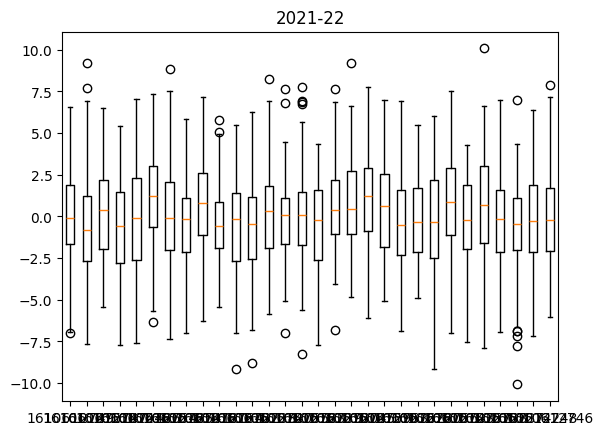

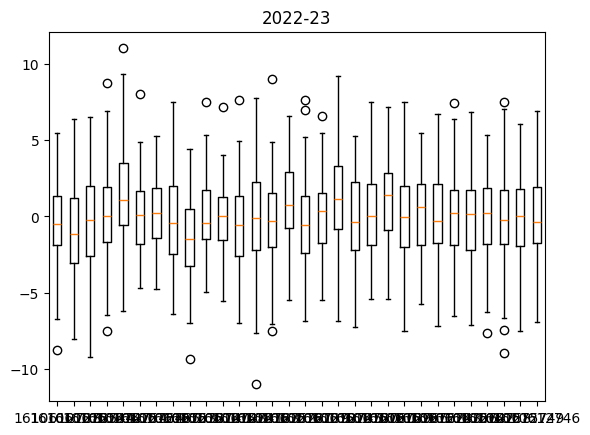

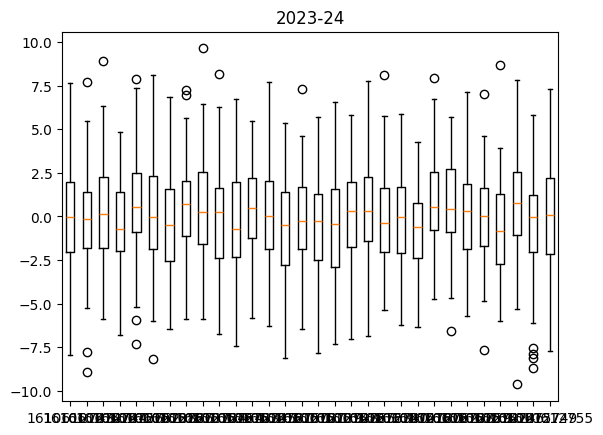

In [30]:
# Loop through team_ids
season_list = ["2021-22","2022-23","2023-24"]

for season in season_list:
    # Query data
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)

    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data

    pos_diffs = {}
    
    for event in events.index:
        # Event-dependent assignments
        home_id = events.loc[event,"home_id"]               # Assign home
        away_id = events.loc[event,"away_id"]               # Assign away
        if home_id not in pos_diffs.keys():
            pos_diffs[home_id] = []
        if away_id not in pos_diffs.keys():
            pos_diffs[away_id] = []
        game_df = boxscores[ boxscores.game_id==event ]     # Event-level df
        # Partition game data by home/away
        home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        home_pos = mu.pos_calc(home_df)[0]
        away_pos = mu.pos_calc(away_df)[0]
        # Compare and assign possession differences
        pos_diff = round(home_pos-away_pos,2)
        if pos_diff != 0:                                           
            pos_diffs[home_id] = pos_diffs[home_id] + [pos_diff]    # pos_diff is home value by default
            pos_diffs[away_id] = pos_diffs[away_id] + [pos_diff*-1] # away value is always (-1) of home value
        else:
            pos_diffs[home_id] = pos_diffs[home_id] + [pos_diff]
            pos_diffs[away_id] = pos_diffs[away_id] + [pos_diff]

    labels,data = pos_diffs.keys(),pos_diffs.values()
    plt.boxplot(data)
    plt.xticks(range(1,len(labels)+1),labels)    
    plt.title(f"{season}")
    plt.show()
    
    print()

In [ ]:
"""
Breaking the differences out by team supports my assumption that extreme differences occur occasionally by all
teams and that it's not any particular team(s) skewing the data. The possessions calculation is consistent

"""

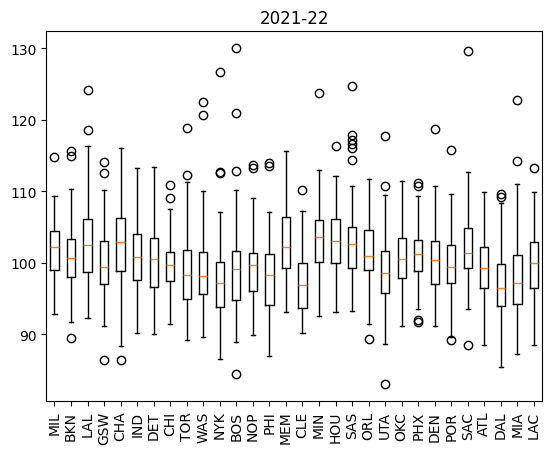

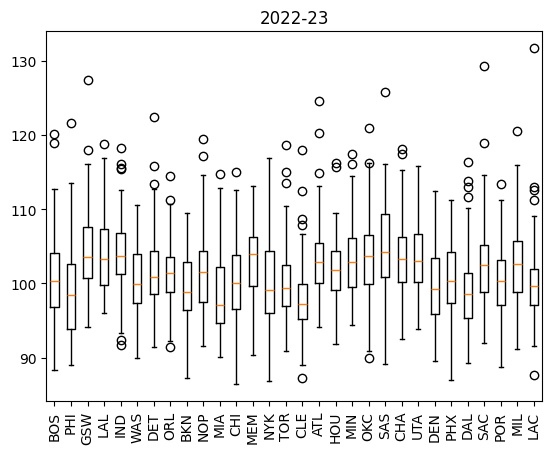

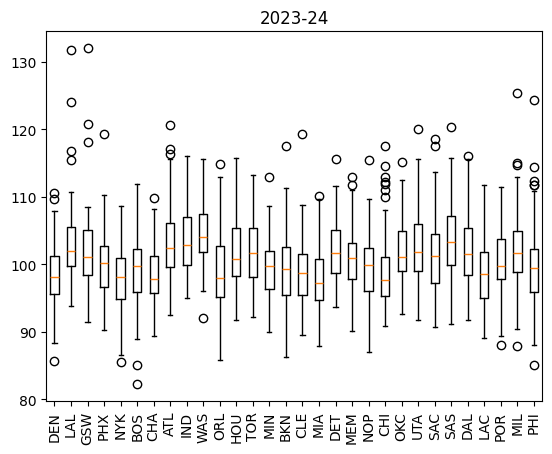

In [43]:
# REGULAR SEASON Possessions by team
# Loop through team_ids
season_list = ["2021-22","2022-23","2023-24"]
team_info = pd.read_sql_query("select * from teams",con=engine)  # Read in team info
team_info.set_index("team_id",inplace=True)                      # Set index of team info to 'team_id'    

for season in season_list:
    # Query data
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)

    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data

    team_possessions = {}
    
    for event in events.index:
        # Event-dependent assignments
        home_id = events.loc[event,"home_id"]               # Assign home
        away_id = events.loc[event,"away_id"]               # Assign away
        if home_id not in team_possessions.keys():
            team_possessions[home_id] = []
        if away_id not in team_possessions.keys():
            team_possessions[away_id] = []
        game_df = boxscores[ boxscores.game_id==event ]     # Event-level df
        # Partition game data by home/away
        home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        home_pos = mu.pos_calc(home_df)[0]
        away_pos = mu.pos_calc(away_df)[0]
        # Assign possession differences
        team_possessions[home_id] = team_possessions[home_id] + [home_pos]
        team_possessions[away_id] = team_possessions[away_id] + [away_pos]
    
    labels,data = team_possessions.keys(),team_possessions.values()
    labels = [team_info.loc[x,"team_abbreviation"] for x in team_possessions.keys()]
    plt.boxplot(data)
    plt.xticks(range(1,len(labels)+1),labels,rotation=90)    
    plt.title(f"{season}")
    plt.show()

In [58]:
"""
When evaluating the personality of a team, it is important to understand its relationship with possessions
Possessions imply pace...do teams impose their pace on other teams? Are they susceptible to their oppenent's pace?
How do teams perform in accordance with pace? Output, efficiency

Next steps:
By team by game, running average, opponent average and actual possessions
    Create metric that compares proximity of both averages to actual
    Model this metric to determine 'will'
    Boxplot 'will'
"""

# Function block
def get_events(season):
    events = mu.query_table("events",season)
    events = events[ events["game_type"]=="Regular Season" ]
    events.sort_values("game_time_utc",inplace=True)    # Sort by date, preserve time order
    events.set_index("game_id",inplace=True)
    return events    


def opp_assign(row,team):
    if row.home_id != team:
        opp = row.home_id
    else:
        opp = row.away_id
    return opp


def opp_retrieve(game,opp):
    data = team_data[opp]
    opp_pos = data[ data.game_id==game ]["pos"].iat[0]
    opp_cum = data[ data.game_id==game ]["pos_cum"].iat[0]
    return opp_pos,opp_cum


def schedule_dict(df,team):
    df["game_num"] = df["game_time_utc"].expanding().count()
    df["game_num"] = df["game_num"].astype(int)
    schedule = df[["game_num","opp"]]
    team_events[team] = schedule.T.to_dict()   

In [64]:

season_list = ["2021-22","2022-23","2023-24"]
team_info = pd.read_sql_query("select * from teams",con=engine)  # Read in team info
team_info.set_index("team_id",inplace=True)                      # Set index of team info to 'team_id'    

for season in season_list:
    # Query data
    events = get_events(season)
    boxscores = mu.query_table("boxscore",season)       # Read in boxscore data

    team_events = {}
    team_data = {}
    
    for team in events.home_id.unique():                    # All teams have home games    
        # Create { team:{game_id:game_num} }
        schedule = events[ (events.home_id==team) | (events.away_id==team) ]
        schedule["opp"] = schedule.apply(lambda row: opp_assign(row,team),axis=1)

        schedule_dict(schedule,team)

        # Filter boxscores by team
        stats = boxscores[ (boxscores.team_id==team) & (boxscores.game_id.isin(events.index)) ][["game_id","fga","oreb","tov","fta"]]
        stats = stats.groupby(["game_id"]).sum()
        stats["pos"] = stats.apply(lambda row: round(mu.pos_calc(row)[0],2),axis=1)
        stats["pos_cum"] = round(stats["pos"].expanding().mean(),2)         # Uses current pos in calculation
        stats["pos_cum"] = stats["pos_cum"].shift(periods=1,fill_value=0)   # This is pos_cum before game is played
        stats.reset_index(inplace=True)
        stats["game_num"] = stats["game_id"].apply(lambda x: team_events[team][x]["game_num"])
        stats["opp"] = stats["game_id"].apply(lambda x: team_events[team][x]["opp"])
        #stats.set_index("game_id",inplace=True)    

        team_data[team] = stats             # Add df to dictionary
    
    # Now loop through every df and retrieve opponent pos and pos_cum
    # Calculate will

    for team in team_data.keys():
        opp_pos_list = []
        opp_cum_list = []
        df = team_data[team]
        for row in df.itertuples(index=False,name=None):
            opp_pos,opp_cum = opp_retrieve(row[0],row[-1])
            opp_pos_list.append(opp_pos)
            opp_cum_list.append(opp_cum)
        
        # Opponent data
        df["opp_pos"] = opp_pos_list
        df["opp_cum"] = opp_cum_list
        # Metrics
        df["team_diff"] = df["pos"] - df["pos_cum"]                     # Team error
        df["opp_diff"] = df["opp_pos"] - df["opp_cum"]                  # Opponent error
        df["mean_diff"] = round(df[["pos","opp_pos"]].mean(axis=1),2)
        
        print(df.head())


    
    
    #labels,data = team_possessions.keys(),team_possessions.values()
    #labels = [team_info.loc[x,"team_abbreviation"] for x in team_possessions.keys()]
    #plt.boxplot(data)
    #plt.xticks(range(1,len(labels)+1),labels,rotation=90)    
    #plt.title(f"{season}")
    #plt.show()

      game_id  fga  oreb  tov  fta     pos  pos_cum  game_num         opp  \
0  0022100001  105    13    7   18  106.85     0.00         1  1610612751   
1  0022100015   84     5   15   29  106.64   106.85         2  1610612748   
2  0022100032   83     7   20   22  105.59   106.74         3  1610612759   
3  0022100042   85     7   13   31  104.52   106.36         4  1610612754   
4  0022100060   95    13    8   21   99.16   105.90         5  1610612750   

   opp_pos  opp_cum  team_diff  opp_diff  mean_diff  
0   101.03     0.00     106.85    101.03     103.94  
1   109.52     0.00      -0.21    109.52     108.08  
2   103.62   101.98      -1.15      1.64     104.60  
3   104.41   109.11      -1.84     -4.70     104.46  
4   105.41   104.55      -6.74      0.86     102.28  
      game_id  fga  oreb  tov  fta     pos  pos_cum  game_num         opp  \
0  0022100002   95     5   17   19  115.28     0.00         1  1610612744   
1  0022100025   86    12   16   29  102.64   115.28        

In [168]:
dft = schedule[["opp","home_id"]]
dft_dict = dft.T.to_dict()
dft_dict['0022300075']["opp"]

'1610612749'

In [2]:
######## Create df of teams and regular season win %
season = "2021-22"
import mathletics_utilities as mu

standings = mu.record_builder(season)
standings

Philadelphia 76ers 1
Philadelphia 76ers 2
Philadelphia 76ers 3
Philadelphia 76ers 4
Philadelphia 76ers 5
Philadelphia 76ers 6
Detroit Pistons 1
Detroit Pistons 2
Detroit Pistons 3
Detroit Pistons 4
Detroit Pistons 5
Phoenix Suns 1
Phoenix Suns 2
Phoenix Suns 3
Phoenix Suns 4
Phoenix Suns 5
Sacramento Kings 1
Sacramento Kings 2
Sacramento Kings 3
Sacramento Kings 4
Sacramento Kings 5
Sacramento Kings 6
Sacramento Kings 7
Portland Trail Blazers 1
Portland Trail Blazers 2
Portland Trail Blazers 3
Portland Trail Blazers 4
Portland Trail Blazers 5
Utah Jazz 1
Utah Jazz 2
Utah Jazz 3
Utah Jazz 4
Utah Jazz 5
New York Knicks 1
New York Knicks 2
New York Knicks 3
New York Knicks 4
New York Knicks 5
New York Knicks 6
Toronto Raptors 1
Toronto Raptors 2
Toronto Raptors 3
Toronto Raptors 4
Toronto Raptors 5
Toronto Raptors 6
Toronto Raptors 7
Charlotte Hornets 1
Charlotte Hornets 2
Charlotte Hornets 3
Charlotte Hornets 4
Charlotte Hornets 5
Charlotte Hornets 6
Washington Wizards 1
Washington Wizar

In [48]:
dict_test = {"att1":{"btt1":0,"btt2":0},"att2":0}

dict_test["att1"]["btt1"] += 1
dict_test["att1"]["ctt1"] = 5
dict_test

{'att1': {'btt1': 1, 'btt2': 0, 'ctt1': 5}, 'att2': 0}

In [7]:
###### Create df of ppg and pmpg
reg_season_events = mu.query_tables("events",season)
reg_season_events = reg_season_events[ reg_season_events.game_type=="Regular Season" ]["game_id"]

boxscores = mu.query_tables("boxscore",season)
boxscores = boxscores[ boxscores["game_id"].isin(reg_season_events) ]
gb = boxscores.groupby(["game_id","team_id"]).agg(
                                    pts=("pts","sum"),
                                    pm=("plus_minus","sum"))
#gb["ppg"] = gb.pts.apply(lambda x: round(x/82,0))
#gb["pmpg"] = gb.pm.apply(lambda x: round(x/82,0))
gb

pts   pm
game_id    team_id             
0022100001 1610612749  127  115
           1610612751  104 -115
0022100002 1610612744  121   35
           1610612747  114  -35
0022100003 1610612754  122   -5
...                    ...  ...
0022101228 1610612765  106  -60
0022101229 1610612756  109  -35
           1610612758  116   35
0022101230 1610612757   80 -155
           1610612762  111  155

[2460 rows x 2 columns]

In [6]:
boxscores[ (boxscores["game_id"]=="0022100014") & (boxscores["team_id"]=="1610612737")]

,game_id,team_id,player_id,min,fgm,fga,fg3m,fg3a,ftm,fta,...,tov,stl,blk,pf,pts,plus_minus,nba_fantasy_pts,dd2,td3,period
21904,0022100014,1610612737,203991,5.9,1,1,0,0,0,0,...,0,0,1,0,2,4,8.6,1,0,1
21906,0022100014,1610612737,203992,6.3,2,2,2,2,0,0,...,2,0,0,2,6,2,5.5,0,0,1
21907,0022100014,1610612737,1628989,6.2,1,4,0,1,0,0,...,0,0,0,0,2,-2,7.1,0,0,1
21909,0022100014,1610612737,1629631,8.7,1,3,0,0,0,0,...,0,0,0,0,2,-1,4.4,0,0,1
21910,0022100014,1610612737,1629629,5.7,1,5,0,1,2,2,...,0,0,0,0,4,0,4.0,0,0,1
21911,0022100014,1610612737,203476,3.3,1,1,0,0,0,0,...,0,1,1,0,2,3,8.0,0,0,1
21912,0022100014,1610612737,1626153,2.5,0,1,0,1,0,0,...,0,0,0,0,0,-1,2.4,0,0,1
21915,0022100014,1610612737,1629027,9.5,0,4,0,1,0,0,...,2,0,0,0,0,3,-0.5,1,0,1
21919,0022100014,1610612737,203524,3.3,0,0,0,0,0,0,...,0,1,0,0,0,3,5.7,0,0,1
21923,0022100014,1610612737,1628381,8.7,2,3,0,0,0,0,...,0,0,0,0,4,-1,13.0,0,0,1


In [16]:
players = pd.read_sql_query("select * from players",con=engine)
players.set_index("player_id",inplace=True)
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 1630165 to 1629232
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_name  818 non-null    object
dtypes: object(1)
memory usage: 12.8+ KB


In [8]:
df = pd.read_sql_query("select * from lineups_202122 limit 10",con=engine)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   group_id    10 non-null     object 
 1   gp          10 non-null     int64  
 2   min         10 non-null     float64
 3   fgm         10 non-null     int64  
 4   fga         10 non-null     int64  
 5   fg3m        10 non-null     int64  
 6   fg3a        10 non-null     int64  
 7   ftm         10 non-null     int64  
 8   fta         10 non-null     int64  
 9   oreb        10 non-null     int64  
 10  dreb        10 non-null     int64  
 11  ast         10 non-null     int64  
 12  tov         10 non-null     int64  
 13  stl         10 non-null     int64  
 14  blk         10 non-null     int64  
 15  pf          10 non-null     int64  
 16  pts         10 non-null     int64  
 17  plus_minus  10 non-null     int64  
 18  team_id     10 non-null     object 
 19  period      10 non-null     int6

In [21]:
def id_to_name(group_id):

    for group in df.group_id:
        group = group.strip("-")
        player_ids = group.split("-")
        
        player_names = []
        for id in player_ids:
            name = players["player_name"].loc[id]
            last_name = name.split()[1]
            player_names.append(last_name)
        group_names = "-".join(player_names)
    return group_names

In [22]:
df["group_id"] = df["group_id"].apply(lambda x: id_to_name(x))
df

,group_id,gp,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,...,ast,tov,stl,blk,pf,pts,plus_minus,team_id,period,game_id
0,Green-Harris-Korkmaz-Thybulle-Maxey,1,6.7,4,11,0,2,5,5,2,...,2,2,1,1,3,13,-7,1610612755,1,0022101228
1,Green-Harris-Korkmaz-Thybulle-Maxey,1,2.5,4,4,0,0,2,2,0,...,1,0,3,1,1,10,5,1610612755,1,0022101228
2,Green-Harris-Korkmaz-Thybulle-Maxey,1,1.3,2,3,0,1,2,2,1,...,1,0,0,0,0,6,4,1610612755,1,0022101228
3,Green-Harris-Korkmaz-Thybulle-Maxey,1,0.9,2,2,1,1,0,0,0,...,1,0,1,1,1,5,2,1610612755,1,0022101228
4,Green-Harris-Korkmaz-Thybulle-Maxey,1,0.7,1,1,0,0,0,0,0,...,1,0,0,0,0,2,2,1610612755,1,0022101228
5,Green-Harris-Korkmaz-Thybulle-Maxey,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1610612755,1,0022101228
6,Green-Harris-Korkmaz-Thybulle-Maxey,1,2.6,2,4,1,3,3,3,0,...,2,1,1,0,1,8,2,1610612755,2,0022101228
7,Green-Harris-Korkmaz-Thybulle-Maxey,1,2.5,2,5,0,1,0,2,1,...,1,0,1,0,2,4,-3,1610612755,2,0022101228
8,Green-Harris-Korkmaz-Thybulle-Maxey,1,2.3,3,4,1,1,3,3,1,...,2,0,1,0,1,10,6,1610612755,2,0022101228
9,Green-Harris-Korkmaz-Thybulle-Maxey,1,2.2,1,4,0,2,0,0,0,...,1,1,0,0,0,2,-3,1610612755,2,0022101228
